In [1]:
import json

def read_json(file_path): 
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)
    return data

def write_json(file_path, data):
    with open(file_path, 'w', encoding='utf-8') as file:
        json.dump(data, file, ensure_ascii=False, indent=4)

In [2]:
# data = read_json('/inspire/hdd/ws-ba572160-47f8-4ca1-984e-d6bcdeb95dbb/a100-maybe/albus/DataSet/LLaVA-Select/llava_image_tune_.json')
data = read_json('/inspire/hdd/ws-ba572160-47f8-4ca1-984e-d6bcdeb95dbb/a100-maybe/albus/DataSet/LLaVA-Select/llava_image_tune_logits_NoImg_Built.json')
 




In [3]:
len(data)

624610

In [8]:
import random
 
my_list = data
sample_size = int(len(my_list) * 0.6)
random_sample = random.sample(my_list, sample_size)

print("原始列表:", len(my_list))
print("随机选择的20%数据:", len(random_sample))

原始列表: 624610
随机选择的20%数据: 374766


In [10]:
# write_json('/inspire/hdd/ws-ba572160-47f8-4ca1-984e-d6bcdeb95dbb/a100-maybe/albus/DataSet/LLaVA-Select/llava_image_tune_rand_20P.json',random_sample)
# write_json('/inspire/hdd/ws-ba572160-47f8-4ca1-984e-d6bcdeb95dbb/a100-maybe/albus/DataSet/LLaVA-Select/llava_image_tune_rand_40P.json',random_sample)
# write_json('/inspire/hdd/ws-ba572160-47f8-4ca1-984e-d6bcdeb95dbb/a100-maybe/albus/DataSet/LLaVA-Select/llava_image_tune_rand_60P.json',random_sample)




------

In [7]:
# # 按正态分布生成随机小数
# mean = 8.5  # 均值 (中心点)
# std = 3.5   # 标准差 (数据的散布程度)

# # 生成 1000 个随机小数
# normal_floats = np.random.normal(loc=mean, scale=std, size=1000)
# rounded_normal_floats = [round(num, 2) for num in normal_floats] 


In [188]:
import numpy as np

# 随机生成 0 到 17 的小数，保留两位小数
random_floats = np.random.uniform(0, 18, size=3000)  
rounded_floats = [round(num, 2) for num in random_floats]  


intervals = [(0, 3), (3, 6), (6, 9), (9, 12), (12, 15), (15, 18)]
weights = [0.1, 0.3, 0.5, 0.7, 0.9, 0.9]  # 每个区间的权重
weights = np.array(weights) / np.sum(weights)
chosen_intervals = np.random.choice(range(len(intervals)), size=1000, p=weights)

# 在选定区间内从生成的小数列表中采样
selected_samples = []
for i in chosen_intervals:
    # 筛选在该区间内的小数
    interval_data = [x for x in rounded_floats if intervals[i][0] <= x < intervals[i][1]]
    if interval_data:  # 确保区间内有数据
        selected_samples.append(np.random.choice(interval_data))
 

In [189]:
len(selected_samples)

1000

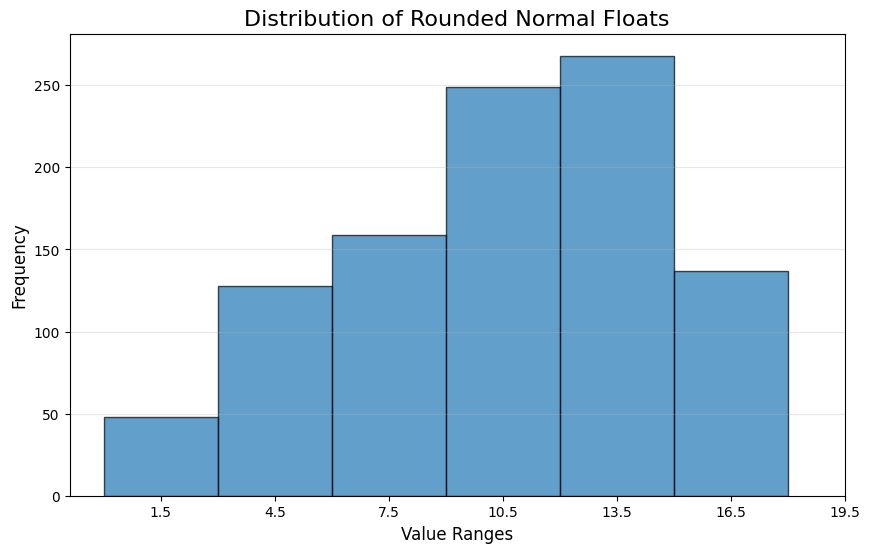

In [190]:
import matplotlib.pyplot as plt

# 更细的区间划分
fine_bins = np.arange(1.5, 21, 3)  # 每个区间宽度为 1
fine_counts, _ = np.histogram(selected_samples, bins=fine_bins)

# # 输出各区间的元素个数
# fine_interval_counts = {f"[{fine_bins[i]}, {fine_bins[i+1]})": fine_counts[i] for i in range(len(fine_counts))}
# fine_interval_counts


# 绘制柱状图显示不同区间的元素个数
plt.figure(figsize=(10, 6))
plt.bar(fine_bins[:-1], fine_counts, width=3, edgecolor="black", alpha=0.7)
plt.title("Distribution of Rounded Normal Floats", fontsize=16)
plt.xlabel("Value Ranges", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.xticks(fine_bins)  # 设置 x 轴刻度
plt.show()

------

In [15]:
import json

def read_json(file_path): 
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)
    return data

def write_json(file_path, data):
    with open(file_path, 'w', encoding='utf-8') as file:
        json.dump(data, file, ensure_ascii=False, indent=4)

In [16]:
data_1 =  read_json('/inspire/hdd/ws-ba572160-47f8-4ca1-984e-d6bcdeb95dbb/a100-maybe/albus/DataSet/LLaVA-Select/New_llava_Logits_NImg_7B_2025_01_12.json')

In [17]:
data_1[0]

{'id': 244066,
 'conversations': [{'from': 'human',
   'value': '############\n\nWhere is this taken?\nAnswer the question using a single word or phrase. Circus ############\n \nDoes the previous paragraph demarcated within ### and ###\ncontain informative signal for visual instruction tuning a vision-language model?\nAn informative datapoint should be well-formatted, contain some\nusable knowledge of the world, and strictly NOT have any harmful,\nracist, sexist, etc. content.\nOPTIONS:\n- yes\n- no\n'},
  {'from': 'gpt', 'value': 'response: yes'}],
 'ori_conversations': [{'from': 'human',
   'value': '<image>\nWhere is this taken?\nAnswer the question using a single word or phrase.'},
  {'from': 'gpt', 'value': 'Circus'}],
 'Old_Path': 'llava_image_tune/coco/train2017/000000355857.jpg',
 'yes_target_logprob_7B_NImg': -15.875,
 'logits_shape': [1, 32000]}

In [18]:
yes_target_logprob_7B_NImg = []
 
for i in data_1:
    yes_target_logprob_7B_NImg.append(i['yes_target_logprob_7B_NImg'])

In [19]:
max(yes_target_logprob_7B_NImg), min(yes_target_logprob_7B_NImg), len(yes_target_logprob_7B_NImg)

(-12.0625, -23.125, 624640)

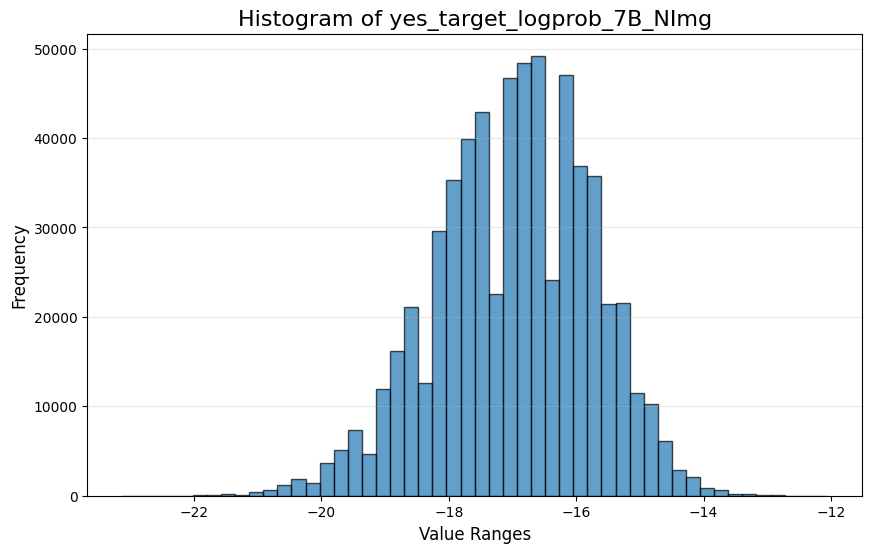

In [20]:
# 环境已重置，重新加载必要的模块
import matplotlib.pyplot as plt
 
 
# sorted_data = sorted(yes_target_logprob_7B_NImg)
# plt.figure(figsize=(10, 6))
# plt.plot(range(len(sorted_data)), yes_target_logprob_7B_NImg, 
#          marker='o', linestyle='-', color='blue', alpha=0.7)

 
# plt.title("Line Plot of yes_target_logprob_7B_NImg", fontsize=16)
# plt.xlabel("Index", fontsize=12)
# plt.ylabel("Value", fontsize=12)
# plt.grid(alpha=0.3)
# plt.show()




# 绘制柱状图查看数据分布
plt.figure(figsize=(10, 6))
plt.hist(yes_target_logprob_7B_NImg, bins=50, edgecolor='black', alpha=0.7)
plt.title("Histogram of yes_target_logprob_7B_NImg", fontsize=16)
plt.xlabel("Value Ranges", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

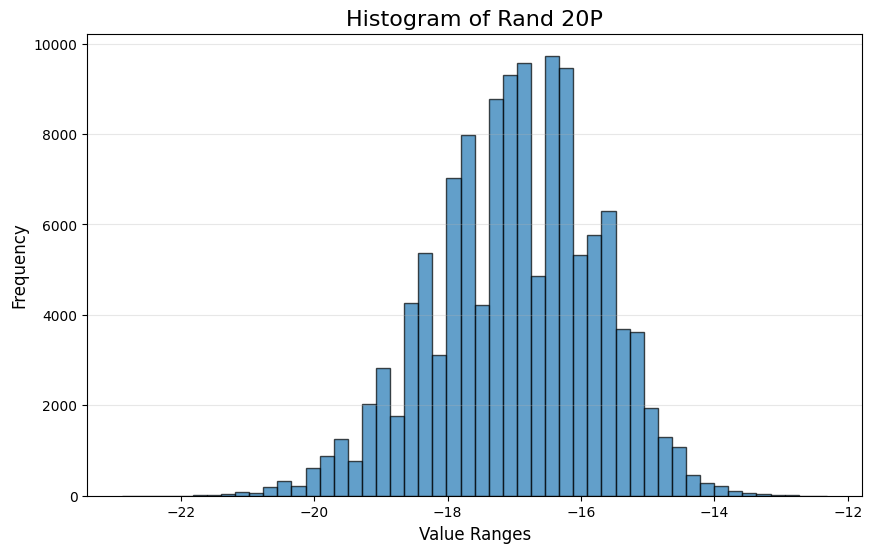

In [21]:
import random

# 假设已有数据列表
data = yes_target_logprob_7B_NImg 
sample_size = int(0.2 * len(data))
sampled_data_rand20P = random.sample(data, sample_size)
 
# 绘制柱状图查看数据分布
plt.figure(figsize=(10, 6))
plt.hist(sampled_data_rand20P, bins=50, edgecolor='black', alpha=0.7)
plt.title("Histogram of Rand 20P", fontsize=16)
plt.xlabel("Value Ranges", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

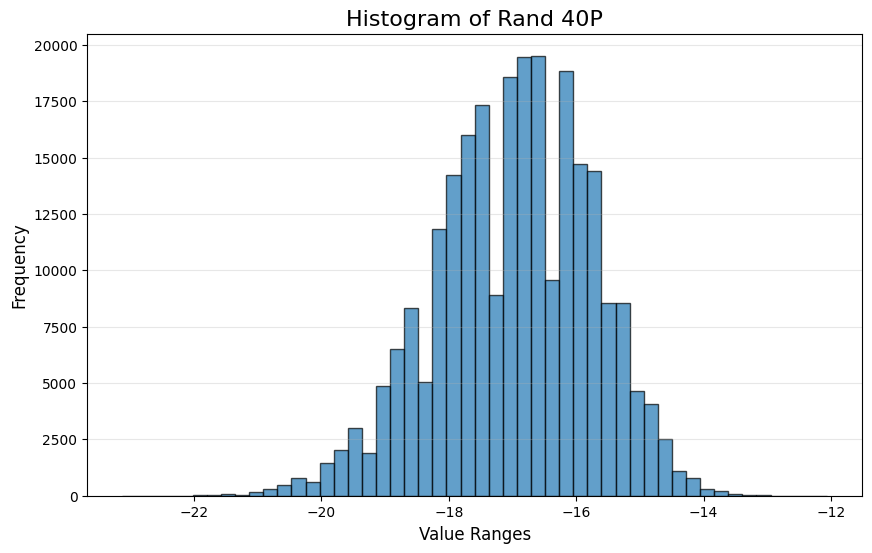

In [22]:
import random

# 假设已有数据列表
data = yes_target_logprob_7B_NImg 
sample_size = int(0.4 * len(data))
sampled_data_rand40P = random.sample(data, sample_size)
 
# 绘制柱状图查看数据分布
plt.figure(figsize=(10, 6))
plt.hist(sampled_data_rand40P, bins=50, edgecolor='black', alpha=0.7)
plt.title("Histogram of Rand 40P", fontsize=16)
plt.xlabel("Value Ranges", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

In [23]:
len(sampled_data_rand20P)

124928

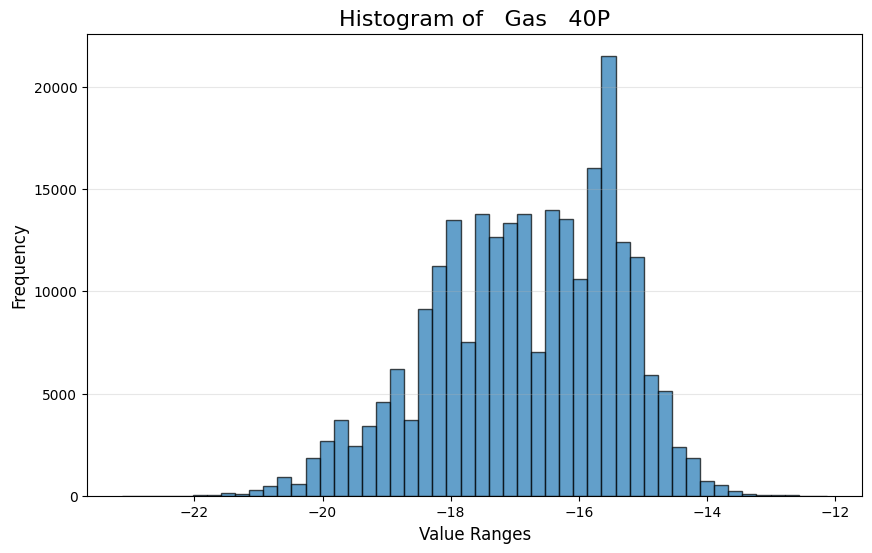

In [24]:
import numpy as np

# 假设已有数据列表
data = yes_target_logprob_7B_NImg  # 使用上传的数据

# 划分数据范围
min_value = min(data)
max_value = max(data)
intervals = np.linspace(min_value, max_value, 7)  # 划分成6个区间

# 为每个区间设置采样权重（例如：[0.1, 0.3, 0.5, 0.7, 0.9, 0.9]）
weights = [0.1, 0.3, 0.5, 0.7, 0.9, 0.9]
weights = np.array(weights) / np.sum(weights)  # 权重归一化

# 根据权重和区间对数据进行分组并进行采样
selected_samples = []
for i in range(6):
    # 获取属于该区间的数据
    interval_data = [x for x in data if intervals[i] <= x < intervals[i+1]]
    
    # 按照权重从该区间数据中采样
    if interval_data:
        sample_size = int(weights[i] * len(data))  # 根据权重决定采样数量
        # 确保采样数量不大于区间内的数据量
        sample_size = min(sample_size, len(interval_data))  
        selected_samples.extend(np.random.choice(interval_data, size=sample_size, replace=False))
        

# 假设已有数据列表
data = selected_samples 
sample_size = int(0.4 * len(yes_target_logprob_7B_NImg))
# sampled_data_gas20P = random.sample(data, sample_size)
sampled_data_gas40P = random.sample(data, sample_size)
# print(len(sampled_data_gas20P)) 


# 绘制柱状图查看数据分布
plt.figure(figsize=(10, 6))
plt.hist(sampled_data_gas40P, bins=50, edgecolor='black', alpha=0.7)
plt.title("Histogram of   Gas   40P", fontsize=16)
plt.xlabel("Value Ranges", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

In [25]:
len(yes_target_logprob_7B_NImg)

624640

In [30]:
sampled_data_gas40P

[-16.75,
 -16.125,
 -19.5,
 -19.125,
 -16.75,
 -16.125,
 -16.625,
 -17.25,
 -15.375,
 -16.75,
 -15.625,
 -18.125,
 -18.375,
 -14.0,
 -18.125,
 -16.375,
 -13.5625,
 -16.25,
 -16.0,
 -15.875,
 -16.875,
 -18.125,
 -16.625,
 -19.25,
 -15.1875,
 -17.5,
 -17.375,
 -14.375,
 -18.375,
 -17.875,
 -15.5625,
 -15.3125,
 -15.3125,
 -18.125,
 -15.375,
 -14.8125,
 -19.375,
 -16.25,
 -20.5,
 -18.625,
 -18.375,
 -17.375,
 -18.0,
 -16.0,
 -15.6875,
 -14.125,
 -18.875,
 -15.4375,
 -17.0,
 -15.875,
 -17.625,
 -15.5625,
 -15.625,
 -15.5,
 -17.625,
 -17.75,
 -14.5625,
 -14.5,
 -16.0,
 -17.5,
 -18.125,
 -15.875,
 -16.75,
 -18.625,
 -18.0,
 -17.125,
 -17.5,
 -15.375,
 -20.125,
 -16.5,
 -15.6875,
 -18.375,
 -18.875,
 -17.25,
 -16.125,
 -16.375,
 -17.125,
 -17.0,
 -18.0,
 -15.3125,
 -15.0,
 -16.625,
 -15.375,
 -17.375,
 -17.375,
 -17.625,
 -19.125,
 -16.5,
 -15.9375,
 -18.0,
 -17.75,
 -15.125,
 -15.1875,
 -18.25,
 -15.9375,
 -17.875,
 -16.25,
 -16.125,
 -18.125,
 -15.5,
 -18.625,
 -14.5,
 -16.375,
 -16.5,
 -19

249856


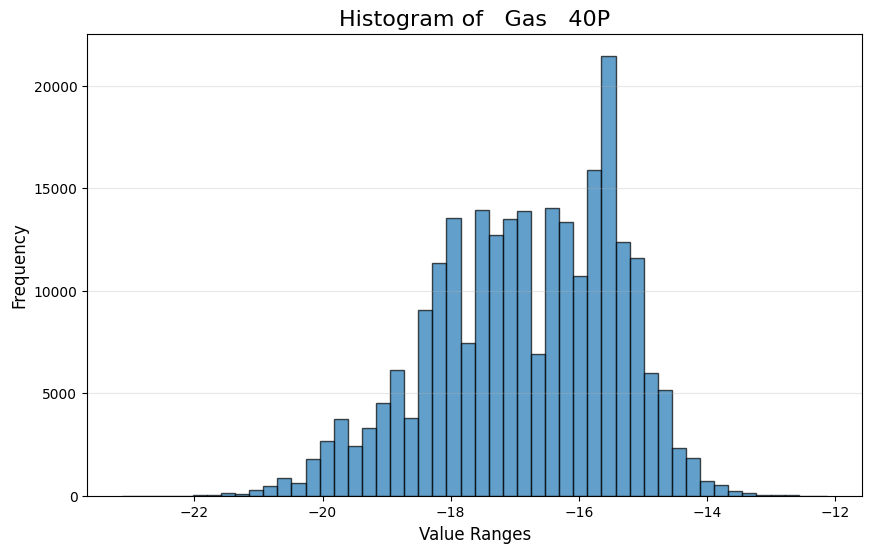

In [26]:
import numpy as np

# 假设已有数据列表
data = yes_target_logprob_7B_NImg  # 使用上传的数据

# 划分数据范围
min_value = min(data)
max_value = max(data)
intervals = np.linspace(min_value, max_value, 7)  # 划分成6个区间

# 为每个区间设置采样权重（例如：[0.1, 0.3, 0.5, 0.7, 0.9, 0.9]）
weights = [0.1, 0.3, 0.5, 0.7, 0.9, 0.9]
weights = np.array(weights) / np.sum(weights)  # 权重归一化

# 根据权重和区间对数据进行分组并进行采样
selected_samples = []
for i in range(6):
    # 获取属于该区间的数据
    interval_data = [x for x in data_1 if intervals[i] <= x['yes_target_logprob_7B_NImg'] < intervals[i+1]]
    
    # 按照权重从该区间数据中采样
    if interval_data:
        sample_size = int(weights[i] * len(data))  # 根据权重决定采样数量
        # 确保采样数量不大于区间内的数据量
        sample_size = min(sample_size, len(interval_data))  
        selected_samples.extend(np.random.choice(interval_data, size=sample_size, replace=False))
        

# 假设已有数据列表
data = selected_samples 
sample_size = int(0.4 * len(yes_target_logprob_7B_NImg))
sampled_data_gas20P = random.sample(data, sample_size)
print(len(sampled_data_gas20P)) 


# sampled_data_gas20P_list = [x['yes_target_logprob_7B_NImg'] for x in sampled_data_gas20P]
sampled_data_gas40P_list = [x['yes_target_logprob_7B_NImg'] for x in sampled_data_gas20P]


# 绘制柱状图查看数据分布
plt.figure(figsize=(10, 6))
# plt.hist(sampled_data_gas20P_list, bins=50, edgecolor='black', alpha=0.7)
plt.hist(sampled_data_gas40P_list, bins=50, edgecolor='black', alpha=0.7)
plt.title("Histogram of   Gas   40P", fontsize=16)
plt.xlabel("Value Ranges", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

In [33]:
# sampled_data_gas20P

for i in sampled_data_gas20P:
    if 'Old_Path' in i:
        i['conversations'] = i['ori_conversations']
        i["image"] = i.pop("Old_Path")
    
    else:
        print(i)
        break    
     

In [36]:
sampled_data_gas20P[10000]

{'id': 463372,
 'conversations': [{'from': 'human',
   'value': '<image>\nIs the plate on top of the table round and black?\nAnswer the question using a single word or phrase.'},
  {'from': 'gpt', 'value': 'Yes'},
  {'from': 'human', 'value': 'Are the buns on the right part of the picture?'},
  {'from': 'gpt', 'value': 'No'},
  {'from': 'human',
   'value': 'What is used to make the plate on top of the table?'},
  {'from': 'gpt', 'value': 'Plastic'},
  {'from': 'human', 'value': 'What is the plate made of?'},
  {'from': 'gpt', 'value': 'Plastic'},
  {'from': 'human',
   'value': 'Are there any mugs or plates that are made of glass?'},
  {'from': 'gpt', 'value': 'No'},
  {'from': 'human',
   'value': 'Do you see any buns to the left of the food in the top of the picture?'},
  {'from': 'gpt', 'value': 'Yes'},
  {'from': 'human',
   'value': 'Which seems to be healthier, the lettuce or the fries?'},
  {'from': 'gpt', 'value': 'Lettuce'},
  {'from': 'human', 'value': 'What color is the jac

In [37]:
# write_json('/inspire/hdd/ws-ba572160-47f8-4ca1-984e-d6bcdeb95dbb/a100-maybe/albus/DataSet/LLaVA-Select/llava_image_tune_Logits_Rand_7B_NImg_Gas_20P.json', sampled_data_gas20P)
# 

# data_temp = read_json('/inspire/hdd/ws-ba572160-47f8-4ca1-984e-d6bcdeb95dbb/a100-maybe/albus/DataSet/LLaVA-Select/llava_image_tune_rand_20P.json')
# write_json('/inspire/hdd/ws-ba572160-47f8-4ca1-984e-d6bcdeb95dbb/a100-maybe/albus/DataSet/LLaVA-Select/llava_image_tune_Logits_Rand_7B_NImg_Gas_40P.json', sampled_data_gas20P + data_temp)
# # 



# write_json('/inspire/hdd/ws-ba572160-47f8-4ca1-984e-d6bcdeb95dbb/a100-maybe/albus/DataSet/LLaVA-Select/llava_image_tune_Gas_Rand_7B_NImg_Gas_40P.json', sampled_data_gas20P)
# 

In [81]:
new_temp = sampled_data_gas20P + data_temp
len(new_temp)

249850

In [78]:
sampled_data_gas20P[0]

{'id': 188548,
 'conversations': [{'from': 'human',
   'value': "############\n\nIs the woman wearing a hat?\nAnswer the question using a single word or phrase. Yes Is the woman's glass full? No Is this an outdoor scene? Yes ############\n \nDoes the previous paragraph demarcated within ### and ###\ncontain informative signal for visual instruction tuning a vision-language model?\nAn informative datapoint should be well-formatted, contain some\nusable knowledge of the world, and strictly NOT have any harmful,\nracist, sexist, etc. content.\nOPTIONS:\n- yes\n- no\n"},
  {'from': 'gpt', 'value': 'response: yes'}],
 'ori_conversations': [{'from': 'human',
   'value': '<image>\nIs the woman wearing a hat?\nAnswer the question using a single word or phrase.'},
  {'from': 'gpt', 'value': 'Yes'},
  {'from': 'human', 'value': "Is the woman's glass full?"},
  {'from': 'gpt', 'value': 'No'},
  {'from': 'human', 'value': 'Is this an outdoor scene?'},
  {'from': 'gpt', 'value': 'Yes'}],
 'Old_Path

In [28]:
len(sampled_data_gas20P), len(sampled_data_rand20P)

(249856, 124928)

In [59]:
temp = sampled_data_gas20P + sampled_data_rand20P


int(0.4 * len(yes_target_logprob_7B_NImg)), len(temp)

(249856, 249856)

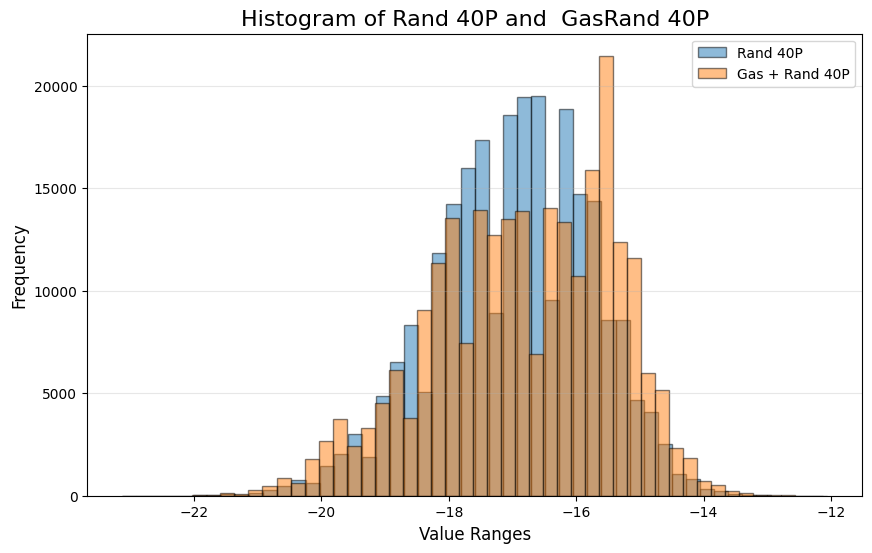

In [31]:
import random
import matplotlib.pyplot as plt

 
 
 
plt.figure(figsize=(10, 6))
plt.hist(sampled_data_rand40P, bins=50, edgecolor='black', alpha=0.5, label="Rand 40P")
plt.hist(sampled_data_gas40P_list, bins=50, edgecolor='black', alpha=0.5, label="Gas + Rand 40P")
plt.title("Histogram of Rand 40P and  GasRand 40P", fontsize=16)
plt.xlabel("Value Ranges", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

TypeError: unhashable type: 'dict'

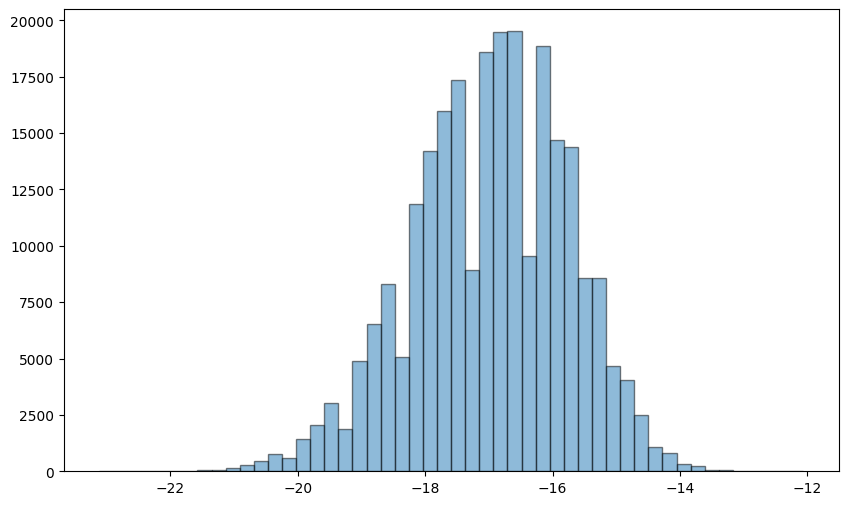

In [29]:
import random
import matplotlib.pyplot as plt

 
plt.figure(figsize=(10, 6))
plt.hist(sampled_data_rand40P, bins=50, edgecolor='black', alpha=0.5, label="Rand 40P")
plt.hist(sampled_data_gas20P, bins=50, edgecolor='black', alpha=0.5, label="GasLogits 40P")
plt.title("Histogram of Rand 40P and  GasLogits 40P", fontsize=16)
plt.xlabel("Value Ranges", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

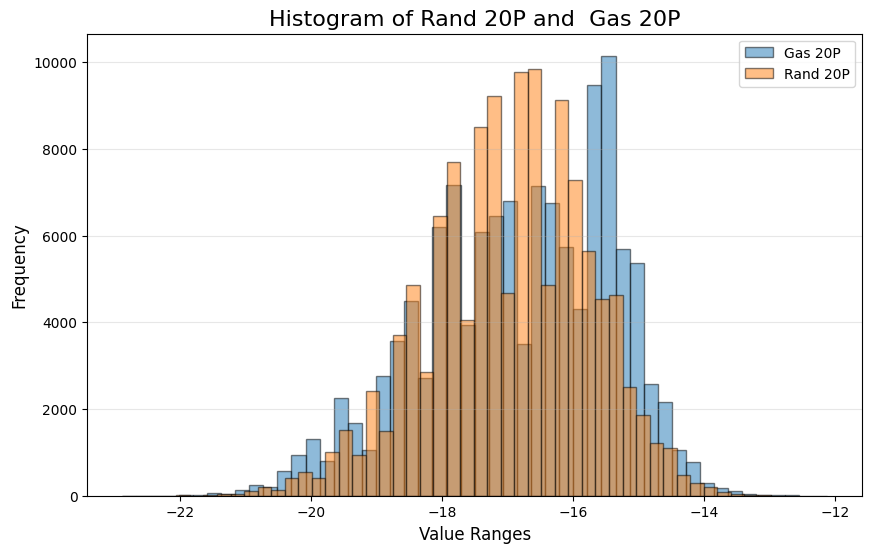

In [77]:
import random
import matplotlib.pyplot as plt

 
 
 
plt.figure(figsize=(10, 6))
plt.hist(sampled_data_gas20P_list, bins=50, edgecolor='black', alpha=0.5, label="Gas 20P")
plt.hist(sampled_data_rand20P, bins=50, edgecolor='black', alpha=0.5, label="Rand 20P")
plt.title("Histogram of Rand 20P and  Gas 20P", fontsize=16)
plt.xlabel("Value Ranges", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

In [63]:
# # 假设已有数据列表
# data = data_1
# # 获取数据的最小值和最大值
# min_value = min(x['yes_target_logprob_7B_NImg'] for x in data)
# max_value = max(x['yes_target_logprob_7B_NImg'] for x in data)

# # 按分布划分为 6 段
# num_splits = 6
# interval_size = (max_value - min_value) / num_splits
# intervals = [(min_value + i * interval_size, min_value + (i + 1) * interval_size) for i in range(num_splits)]

# # 按区间划分数据
# split_lists = [[] for _ in range(num_splits)]
# for item in data:
#     value = item['yes_target_logprob_7B_NImg']
#     for idx, (low, high) in enumerate(intervals):
#         if low <= value < high or (idx == num_splits - 1 and value == high):  # 包含最后一个区间的上界
#             split_lists[idx].append(item)
#             break

# # # 输出每个组
# # for idx, sublist in enumerate(split_lists):
# #     print(f"Group {idx + 1} ({intervals[idx][0]:.2f} ~ {intervals[idx][1]:.2f}): {sublist}")

In [8]:
# len(split_lists[0]) + len(split_lists[1]) + len(split_lists[2]) + len(split_lists[3]) + len(split_lists[4]) + len(split_lists[5])

# len(split_lists[0]) , len(split_lists[1]) , len(split_lists[2]) , len(split_lists[3]) , len(split_lists[4]) , len(split_lists[5])

In [278]:
# from collections import defaultdict
# import numpy as np
# from tqdm import tqdm

# # 预处理数据，将数据按区间分组
# interval_groups = defaultdict(list)
# for x in data_1:
#     value = x['yes_target_logprob_7B_NImg']
#     for idx, (begin, end) in enumerate(intervals):
#         if begin <= value < end:
#             interval_groups[idx].append(x)
#             break

# # 在选定区间内采样
# selected_samples = []
# for i in tqdm(chosen_intervals):
#     interval_data = interval_groups[i]
#     if interval_data:  # 确保区间内有数据
#         selected_samples.append(np.random.choice(interval_data))

In [2]:
data = read_json('/inspire/hdd/ws-ba572160-47f8-4ca1-984e-d6bcdeb95dbb/a100-maybe/albus/DataSet/LLaVA-Select/llava_image_tune_Logits_Rand_7B_NImg_Gas_40P.json')



In [3]:
data[0]

{'id': 188548,
 'conversations': [{'from': 'human',
   'value': "############\n\nIs the woman wearing a hat?\nAnswer the question using a single word or phrase. Yes Is the woman's glass full? No Is this an outdoor scene? Yes ############\n \nDoes the previous paragraph demarcated within ### and ###\ncontain informative signal for visual instruction tuning a vision-language model?\nAn informative datapoint should be well-formatted, contain some\nusable knowledge of the world, and strictly NOT have any harmful,\nracist, sexist, etc. content.\nOPTIONS:\n- yes\n- no\n"},
  {'from': 'gpt', 'value': 'response: yes'}],
 'ori_conversations': [{'from': 'human',
   'value': '<image>\nIs the woman wearing a hat?\nAnswer the question using a single word or phrase.'},
  {'from': 'gpt', 'value': 'Yes'},
  {'from': 'human', 'value': "Is the woman's glass full?"},
  {'from': 'gpt', 'value': 'No'},
  {'from': 'human', 'value': 'Is this an outdoor scene?'},
  {'from': 'gpt', 'value': 'Yes'}],
 'Old_Path

In [9]:
len(data)

249850

In [7]:
for i in data:
    if 'Old_Path' in i:
        i['conversations'] = i['ori_conversations']
        i["image"] = i.pop("Old_Path")


In [14]:
data[200000]

{'id': 425326,
 'image': 'llava_image_tune/vg/VG_100K/2341248.jpg',
 'conversations': [{'from': 'human',
   'value': '<image>\nPlease provide the bounding box coordinate of the region this sentence describes: section of metal railing in snow.'},
  {'from': 'gpt', 'value': '[0.33, 0.54, 0.72, 0.74]'},
  {'from': 'human',
   'value': 'Please provide a short description for this region: [0.62, 0.41, 0.77, 0.53].'},
  {'from': 'gpt', 'value': 'Pants worn by human.'},
  {'from': 'human',
   'value': 'Please provide a short description for this region: [0.28, 0.42, 0.42, 0.52].'},
  {'from': 'gpt', 'value': 'Blue sky with no clouds.'},
  {'from': 'human',
   'value': 'Please provide the bounding box coordinate of the region this sentence describes: blue sky with no clouds.'},
  {'from': 'gpt', 'value': '[0.71, 0.22, 0.8, 0.28]'},
  {'from': 'human',
   'value': 'Please provide a short description for this region: [0.53, 0.27, 0.87, 0.59].'},
  {'from': 'gpt', 'value': 'Person doing trick on 

In [13]:
# write_json('/inspire/hdd/ws-ba572160-47f8-4ca1-984e-d6bcdeb95dbb/a100-maybe/albus/DataSet/LLaVA-Select/llava_image_tune_Logits_Rand_7B_NImg_Gas_40P.json',data)
